In [1]:
from sklearn.datasets import make_blobs

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

In [2]:
X, y = make_blobs(centers=4, random_state=0)

In [6]:
y[:10]

array([0, 3, 0, 0, 0, 0, 2, 3, 0, 3])

In [9]:
(y[:10] == 3).astype(int)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1])

In [3]:
y.shape

(100,)

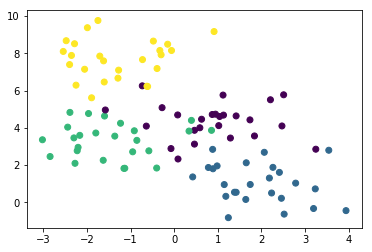

In [4]:
plt.scatter(X[:, 0], X[:, 1], c= y)

In [5]:
class CustomLogisticRegression:
    
    def __init__(self, lr=0.01, iters=20):
        self.__lr = lr
        self.__iters = iters
    
    def fit(self, X, y):
        
        y = y.reshape(-1, 1)
        
        X_mod = np.hstack([np.ones([len(X), 1]), X])
        
        self.classes_ = np.unique(y)
        
        list_theta = []
        
        for klass in self.classes_:
            
            theta = np.zeros([X.shape[1], 1])
            y_mod = (y==klass).astype(int)
            for i in range(self.__iters):
                self.gradient_accend(theta, X_mod, y_mod)
                
            list_theta.append(theta)
            
        self.theta_ = list_theta
        
    def gradient_accend(self, theta, X_mod, y_mod):
        delta_theta = self.gradient(theta, X_mod, y_mod)
        theta -= delta_theta
        
    def gradient(self, theta, X_mod, y_mod):
        yh = self.hypothesis(X_mod)
        diff = (yh - y_mod)
        
        return np.dot(X_mod.T, diff) * self.__lr
        
    def hypothesis(self, theta, X):
        prod = np.dot(X, theta)
        return 1 / (1 + np.exp(-prod))
   
        
        

In [56]:
model = CustomLogisticRegression()

In [57]:
err = model.fit(X, y)

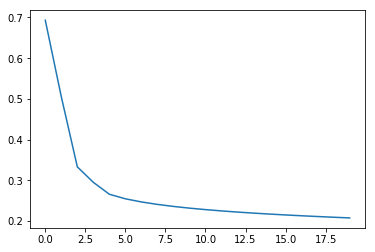

In [58]:
plt.plot(err)

In [59]:
model.theta_

array([[ 1.03887752],
       [ 1.34366726],
       [-1.29079066]])

In [60]:
model.predict(X[:10])

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1])

In [61]:
y[:10]

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1])

In [62]:
model.score(X, y)

0.9

In [63]:
model.confusion_matrix(X, y)

array([[0.43, 0.03],
       [0.07, 0.47]])

In [64]:
a = np.arange(20)

In [65]:
a%5==0

array([ True, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False])

In [66]:
from sklearn.metrics import confusion_matrix

In [68]:
confusion_matrix(y, model.predict(X))

array([[47,  3],
       [ 7, 43]])